In [209]:
#-*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import pprint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# next line disables full display
# pd.reset_option('^display.', silent=True)

# import numpy
# numpy.version.version

In [210]:
data = pd.read_csv('./data/Life Expectancy Data.csv')
data.head()

# Data from
# https://www.kaggle.com/kumarajarshi/life-expectancy-who

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [211]:
# Renaming columns

renamed = []
for col in data.columns:
    # removes leading and trailing spaces, as well as double space in "thinnes 1-19 years"
    cols = ' '.join(col.split())
    renamed.append(cols.replace(" ", "_").lower())
print(len(renamed), 'columns')
print(renamed)

data.columns = data.columns[:0].tolist() + renamed
data.head()

# https://stackoverflow.com/questions/2077897/substitute-multiple-whitespace-with-single-whitespace-in-python

22 columns
['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [212]:
# Check count of NaN values

data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [213]:
# Check zero values

def has_zeros(df):
    '''Check if column in dataframe contains zero values.'''
    import pprint
    
    #totals = []
    totals = {}
    for col in df.columns:
        sum_zero = (df[col] == 0).sum()
        totals[col] = sum_zero
    return totals
    
pprint.pprint(has_zeros(data))

# Not sure what to do with the zeros. It seems feasible to have 0 in some cases, like 0 cases of polio in a
# certain country or a certain year. But there are other features like 'percentage_expenditure' that seems to be
# just missing. Maybe these zeros can be imputed?

{'adult_mortality': 0,
 'alcohol': 0,
 'bmi': 0,
 'country': 0,
 'diphtheria': 0,
 'gdp': 0,
 'hepatitis_b': 0,
 'hiv/aids': 0,
 'income_composition_of_resources': 130,
 'infant_deaths': 848,
 'life_expectancy': 0,
 'measles': 983,
 'percentage_expenditure': 611,
 'polio': 0,
 'population': 0,
 'schooling': 28,
 'status': 0,
 'thinness_1-19_years': 0,
 'thinness_5-9_years': 0,
 'total_expenditure': 0,
 'under-five_deaths': 785,
 'year': 0}


In [234]:
# Convert year from int into object
# Per article, if columns are not "category" there should be no problem.

data['year'] = data['year'].astype(int).astype(object)
data.info()

# https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   object 
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [235]:
# Grouping by country with missing population.

country = data['population'].isna().groupby(data['country']).all()
no_pop = country[country].index.tolist()
print(len(no_pop))
print(no_pop)

48
['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Bolivia (Plurinational State of)', 'Brunei Darussalam', 'Congo', 'Cook Islands', 'Cuba', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Dominica', 'Egypt', 'Gambia', 'Grenada', 'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Libya', 'Marshall Islands', 'Micronesia (Federated States of)', 'Monaco', 'Nauru', 'New Zealand', 'Niue', 'Oman', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Somalia', 'The former Yugoslav republic of Macedonia', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen']


<AxesSubplot:>

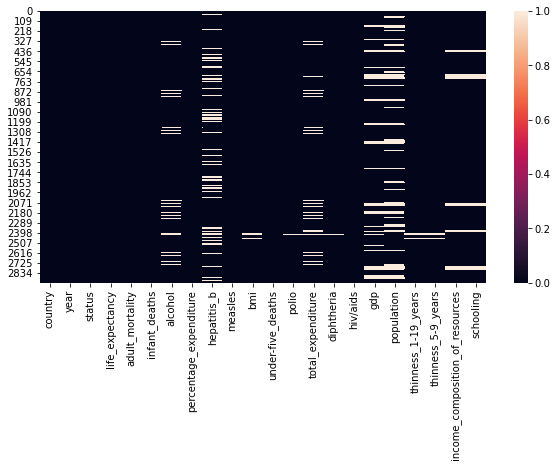

In [236]:
# Visualize missing values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())

# https://www.kaggle.com/stefanost/regression-with-thousands-of-missing-values

In [237]:
corr_matr = data.corr()
corr_matr

# My concern is that there is missing population data for a lot of countries.
# However, population only correlates relatively strongly with infant_deaths(.556) and under-five_deaths (.544)

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis_b,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five_deaths,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373
polio,0.465556,-0.274823,-0.170689,0.221734,0.147259,0.486171,-0.136166,0.284569,-0.188720,1.000000,0.137330,0.673553,-0.159560,0.211976,-0.038540,-0.221823,-0.222592,0.381078,0.417866


<AxesSubplot:>

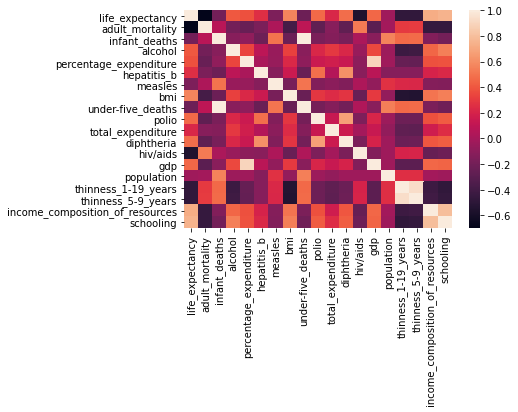

In [238]:
sns.heatmap(data.corr())

In [239]:
data[data['population'].isna()].tail(20)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2886,Viet Nam,2003,Developing,74.0,137.0,30,2.19,0.0,78.0,2297,1.4,37,96.0,4.84,99.0,0.2,NaN,NaN,15.6,16.2,0.592,10.9
2887,Viet Nam,2002,Developing,73.8,137.0,30,2.03,0.0,NaN,6755,1.0,39,92.0,4.70,75.0,0.2,NaN,NaN,15.6,16.3,0.584,10.7
2888,Viet Nam,2001,Developing,73.6,138.0,32,1.84,0.0,NaN,12058,9.6,41,96.0,5.17,96.0,0.1,NaN,NaN,15.7,16.4,0.576,10.6
2889,Viet Nam,2000,Developing,73.4,139.0,33,1.60,0.0,NaN,16512,9.2,43,96.0,4.89,96.0,0.1,NaN,NaN,15.8,16.4,0.569,10.4
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.0,73.0,815,4.4,47,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.0,73.0,400,39.6,46,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
2893,Yemen,2012,Developing,64.7,236.0,36,0.04,0.0,67.0,2177,38.7,46,68.0,5.73,67.0,0.1,NaN,NaN,13.7,13.6,0.494,9.0
2894,Yemen,2011,Developing,64.6,234.0,35,0.04,0.0,69.0,2676,37.9,45,69.0,5.40,69.0,0.1,NaN,NaN,13.7,13.6,0.493,8.6
2895,Yemen,2010,Developing,64.4,233.0,35,0.06,0.0,76.0,510,37.2,45,77.0,5.17,76.0,0.1,NaN,NaN,13.7,13.7,0.488,8.5


In [240]:
data[data['country'] == 'Yemen']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.0,73.0,815,4.4,47,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.0,73.0,400,39.6,46,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
2893,Yemen,2012,Developing,64.7,236.0,36,0.04,0.0,67.0,2177,38.7,46,68.0,5.73,67.0,0.1,NaN,NaN,13.7,13.6,0.494,9.0
2894,Yemen,2011,Developing,64.6,234.0,35,0.04,0.0,69.0,2676,37.9,45,69.0,5.40,69.0,0.1,NaN,NaN,13.7,13.6,0.493,8.6
2895,Yemen,2010,Developing,64.4,233.0,35,0.06,0.0,76.0,510,37.2,45,77.0,5.17,76.0,0.1,NaN,NaN,13.7,13.7,0.488,8.5
2896,Yemen,2009,Developing,64.1,235.0,36,0.03,0.0,76.0,130,36.4,46,76.0,5.32,76.0,0.1,NaN,NaN,13.8,13.7,0.483,8.4
2897,Yemen,2008,Developing,63.8,238.0,37,0.04,0.0,78.0,7,35.7,47,78.0,5.12,78.0,0.1,NaN,NaN,13.8,13.7,0.480,8.5
2898,Yemen,2007,Developing,63.4,24.0,38,0.05,0.0,79.0,13,35.1,49,79.0,4.92,79.0,0.1,NaN,NaN,13.8,13.8,0.477,8.6
2899,Yemen,2006,Developing,63.0,242.0,39,0.04,0.0,78.0,8079,34.5,51,78.0,4.82,78.0,0.1,NaN,NaN,13.9,13.8,0.475,8.7


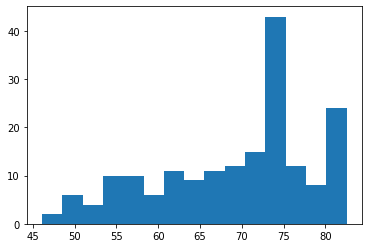

In [241]:
# Histogram of mean life_expectancy grouped by country

country_mean = data.groupby('country')['life_expectancy'].mean()
plt.hist(country_mean, bins=15)
plt.show()

In [242]:
# plt.scatter(data['bmi'], data['adult_mortality'])
# plt.show()

In [243]:
# pair_plot = sns.pairplot(data, height=5)

## Imputing. 
#### First attempt using KNN Imputer.
The problem with this is that I end up with a new dataframe

In [244]:
# First impute data attempt

X = data.copy()

In [245]:
# Preparing for data imputing 

# https://towardsdatascience.com/handling-missing-data-f998715fb73f

from sklearn.impute import KNNImputer

X1 = X[['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b', 'bmi',
              'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population', 'thinness_1-19_years',
              'income_composition_of_resources', 'schooling']].copy()
X1[X1['population'].isna()]

# # https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy

,life_expectancy,adult_mortality,alcohol,hepatitis_b,bmi,polio,total_expenditure,diphtheria,gdp,population,thinness_1-19_years,income_composition_of_resources,schooling
64,76.4,13.0,NaN,99.0,47.7,86.0,NaN,99.0,13566.954100,NaN,3.3,0.784,13.9
65,76.2,131.0,8.56,99.0,47.0,96.0,5.54,99.0,12888.296670,NaN,3.3,0.782,13.9
66,76.1,133.0,8.58,99.0,46.4,98.0,5.33,99.0,12224.864160,NaN,3.3,0.781,13.9
67,75.9,134.0,8.18,98.0,45.7,97.0,5.39,98.0,12565.441970,NaN,3.3,0.778,13.8
68,75.7,136.0,7.84,99.0,45.1,99.0,5.65,99.0,11929.349910,NaN,3.3,0.782,14.1
69,75.6,138.0,7.84,98.0,44.4,99.0,5.63,98.0,12126.876140,NaN,3.3,0.783,14.1
70,75.4,14.0,7.82,98.0,43.8,98.0,4.86,99.0,1312.466920,NaN,3.4,0.788,14.2
71,75.2,142.0,8.27,98.0,43.2,99.0,4.69,99.0,1473.319230,NaN,3.4,0.786,14.4
72,75.0,144.0,8.64,97.0,42.6,98.0,4.27,99.0,14252.294520,NaN,3.4,0.781,14.5
73,74.8,145.0,8.93,99.0,42.0,99.0,4.34,99.0,12724.393770,NaN,3.4,0.773,14.7


In [246]:
# Imputing

knn_imputer = KNNImputer(n_neighbors=4)
filled_df = pd.DataFrame(data=knn_imputer.fit_transform(X1), 
                         columns=['life_expectancy', 'adult_mortality', 'alcohol', 
                        'hepatitis_b', 'bmi', 'polio', 'total_expenditure', 
                        'diphtheria', 'gdp', 'population', 'thinness_1-19_years',
                        'income_composition_of_resources', 'schooling'])
print(filled_df.shape)
filled_df.head()

(2938, 13)


,life_expectancy,adult_mortality,alcohol,hepatitis_b,bmi,polio,total_expenditure,diphtheria,gdp,population,thinness_1-19_years,income_composition_of_resources,schooling
0,65.0,263.0,0.01,65.0,19.1,6.0,8.16,65.0,584.259210,33736494.0,17.2,0.479,10.1
1,59.9,271.0,0.01,62.0,18.6,58.0,8.18,62.0,612.696514,327582.0,17.5,0.476,10.0
2,59.9,268.0,0.01,64.0,18.1,62.0,8.13,64.0,631.744976,31731688.0,17.7,0.470,9.9
3,59.5,272.0,0.01,67.0,17.6,67.0,8.52,67.0,669.959000,3696958.0,17.9,0.463,9.8
4,59.2,275.0,0.01,68.0,17.2,68.0,7.87,68.0,63.537231,2978599.0,18.2,0.454,9.5


In [247]:
filled_df.iloc[2905]

# Result doesn't seem very reliable at least for population.
# From website: https://www.worldometers.info/world-population/yemen-population/
# Yemen's population in 2000 was 17 million. 
# After imputing data, I got 1.33 million.

life_expectancy                    6.800000e+01
adult_mortality                    2.520000e+02
alcohol                            7.000000e-02
hepatitis_b                        1.400000e+01
bmi                                3.120000e+01
polio                              7.400000e+01
total_expenditure                  4.140000e+00
diphtheria                         7.400000e+01
gdp                                7.343543e+02
population                         1.247333e+06
thinness_1-19_years                1.410000e+01
income_composition_of_resources    4.360000e-01
schooling                          7.700000e+00
Name: 2905, dtype: float64

In [248]:
filled_df.isnull().sum()

life_expectancy                    0
adult_mortality                    0
alcohol                            0
hepatitis_b                        0
bmi                                0
polio                              0
total_expenditure                  0
diphtheria                         0
gdp                                0
population                         0
thinness_1-19_years                0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [249]:
filled_df.to_csv('./data/imputed_partial_df.csv')

In [250]:
data.shape

(2938, 22)

In [251]:
filled_df.shape

(2938, 13)

In [230]:
# I imputed data only for columns that had NaN values. Not including the zeros.
# Both dataframes have the same number of rows. I want to merge these dataframes hoping to fill the gaps of NaN wih 
# the imputed data in filled_df.
# How????

# Possible options
# https://stackoverflow.com/questions/26933385/join-merge-two-pandas-dataframes-and-filling
# https://stackoverflow.com/questions/56842140/pandas-merge-dataframes-with-shared-column-fillna-in-left-with-right
# https://stackoverflow.com/questions/58636416/merge-and-fill-missing-values-based-on-multiple-columns-from-another-dataframe-i

['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


['life_expectancy', 'adult_mortality', 'alcohol', 
                        'hepatitis_b', 'bmi', 'polio', 'total_expenditure', 
                        'diphtheria', 'gdp', 'population', 'thinness_1-19_years',
                        'income_composition_of_resources', 'schooling']

In [252]:
# Problem. 
# I ended up with two separate dataframes that I don't know how to merge.

df1 = data.copy()
df2 = filled_df.copy()

new = df1.merge(df2)
# This doesn't quite work as expected since it cuts the number of rows. I am not sure why.
print(new.shape)
new.isna().sum()

##### Another approach is to drop the columsn with NaN in the copy "df1" of the original dataframe. And then builg
# a new dataframe with the imputed values or "all columns from df2". Manual process.

# List numeric columns
# Drop numeric columns in df1.
# Then try new merge again as above.
# numeric_columns = ['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b', 'bmi',
#               'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population', 'thinness_1-19_years',
#               'income_composition_of_resources', 'schooling']

(1649, 22)


country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [269]:
# Trying to use pipline with ColumnTransformer in order to transform data in specific columns.
# That implies OneHotEncoding for the three categorical columns. 
# And SimpleImpute to the rest of numerical columns.
# Will end up with more than 200 columns.

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from numpy import nan



df = data.copy()

# Replace 0 with NaN
# So that these columns can be imputed with the ColumnTransformer instead of accounting for those zeros.
df[['percentage_expenditure', 'income_composition_of_resources', 'schooling']] = df[['percentage_expenditure', 'income_composition_of_resources', 'schooling']].replace(0, nan)
# print(df.info())
#pprint.pprint(has_zeros(df1))

# Split dataframe into input and output variables.
x = df.iloc[:,df.columns != 'life_expectancy']
# print(type(x))
y = df.iloc[:, 3] # life_expectancy is the output column (variable)
# print(type(y))

# Split into train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(X_train.info)

# Build transformers OnHotEncoder and SimpleImputer for categorical and numeric columns respectively.
categorical_features = ['country', 'year', 'status']

numerical_features = ['adult_mortality', 'alcohol', 'percentage_expenditure', 
                      'hepatitis_b', 'bmi', 'polio', 
                      'total_expenditure', 'diphtheria', 'gdp', 
                      'population', 'thinness_1-19_years', 
                      'income_composition_of_resources', 
                      'income_composition_of_resources', 'schooling']

transformers = [
    ('onehot', OneHotEncoder(), categorical_features),
    ('impute', SimpleImputer(strategy='median'), numerical_features)
]

# Should I do the transformation before splitting the dataset, and avoid pipeline?
column_transformer = ColumnTransformer(transformers, remainder='passthrough')

X_train_transformed = column_transformer.fit_transform(X_train)
# X_test_transformed = column_transformer.fit_transform(X_test)
column_transformer.named_transformers_['onehot'].get_feature_names()
# X_train_transformed

# Before trying to put everything in pipeline.
# lr = LinearRegression().fit(X_train_transformed, y_train)
# y_pred = lr.predict(X_test)
# print(y_pred)
##### Having an error here. Apparently there are still NaN values in the datasets (X_train_transformed).





# pipe = Pipeline([
#     ('preprocessing', column_transformer),
#     ('lr', linear_regression)
# ])

# pipe.fit(X_train, y_train)

# https://scikit-learn.org/stable/modules/compose.html#pipeline
# https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
# https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260



(2203, 21) (735, 21) (2203,) (735,)


array(['x0_Afghanistan', 'x0_Albania', 'x0_Algeria', 'x0_Angola',
       'x0_Antigua and Barbuda', 'x0_Argentina', 'x0_Armenia',
       'x0_Australia', 'x0_Austria', 'x0_Azerbaijan', 'x0_Bahamas',
       'x0_Bahrain', 'x0_Bangladesh', 'x0_Barbados', 'x0_Belarus',
       'x0_Belgium', 'x0_Belize', 'x0_Benin', 'x0_Bhutan',
       'x0_Bolivia (Plurinational State of)', 'x0_Bosnia and Herzegovina',
       'x0_Botswana', 'x0_Brazil', 'x0_Brunei Darussalam', 'x0_Bulgaria',
       'x0_Burkina Faso', 'x0_Burundi', 'x0_Cabo Verde', 'x0_Cambodia',
       'x0_Cameroon', 'x0_Canada', 'x0_Central African Republic',
       'x0_Chad', 'x0_Chile', 'x0_China', 'x0_Colombia', 'x0_Comoros',
       'x0_Congo', 'x0_Cook Islands', 'x0_Costa Rica', 'x0_Croatia',
       'x0_Cuba', 'x0_Cyprus', 'x0_Czechia', "x0_Côte d'Ivoire",
       "x0_Democratic People's Republic of Korea",
       'x0_Democratic Republic of the Congo', 'x0_Denmark', 'x0_Djibouti',
       'x0_Dominica', 'x0_Dominican Republic', 'x0_Ecuador'

### \#### Wont do this for now

## Imputing.
#### Second attempt

In [ ]:
# df = data.copy()
# df.head()

In [ ]:
# Convert year from int into object
# Per article, if columns are not "category" there should be no problem.

# df['year'] = df['year'].astype(int).astype(object)
# df.info()

# https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

In [ ]:
# from fancyimpute import KNN
# from sklearn.preprocessing import OrdinalEncoder

# https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa

# After re-reading the article, I am not sure this is the right approach to impute missing numerical data.
# It encodes all the categorical data, which will generate hundreds of new columns. But maybe this is the way.
# For now I will not pursue this approach.


### \###################